In [13]:
import sys
sys.path.insert(1, '/braintree/home/andrewci/brain-score/')
from candidate_models.model_commitments import brain_translated_pool
from cirincione2022_zhou2000_TESTING import load_model_and_BO_stimulus, BO_optimization_and_standard_test, create_response_ratio_plots
import matplotlib.pyplot as plt
import numpy as np

In [14]:
optim_test_dir = '/braintree/data2/active/users/andrewci/stimulus_sets/dicarlo.Cirincione2022_border_ownership_optimization_test'
standard_test_dir = '/braintree/data2/active/users/andrewci/stimulus_sets/dicarlo.Cirincione2022_border_ownership_standard_test'
BO_STIM_NAME = 'dicarlo.Cirincione2022_border_ownership_standard_test'
BO_OPTIM_NAME = 'dicarlo.Cirincione2022_border_ownership_optimization_test'

In [15]:
print(brain_translated_pool.keys())
# alexnet
# cornets
# resnet-50-pytorch
# resnet-50-robust

dict_keys(['alexnet', 'squeezenet1_0', 'squeezenet1_1', 'resnet-18', 'resnet-34', 'resnet-50-pytorch', 'resnet-50-robust', 'vgg-16', 'vgg-19', 'vggface', 'xception', 'densenet-121', 'densenet-169', 'densenet-201', 'inception_v1', 'inception_v2', 'inception_v3', 'inception_v4', 'inception_resnet_v2', 'resnet-50_v1', 'resnet-101_v1', 'resnet-152_v1', 'resnet-50_v2', 'resnet-101_v2', 'resnet-152_v2', 'nasnet_mobile', 'nasnet_large', 'pnasnet_large', 'bagnet9', 'bagnet17', 'bagnet33', 'resnet50-SIN', 'resnet50-SIN_IN', 'resnet50-SIN_IN_IN', 'resnext101_32x8d_wsl', 'resnext101_32x16d_wsl', 'resnext101_32x32d_wsl', 'resnext101_32x48d_wsl', 'fixres_resnext101_32x48d_wsl', 'dcgan', 'convrnn_224', 'resnet18-supervised', 'resnet18-local_aggregation', 'resnet18-instance_recognition', 'resnet18-autoencoder', 'resnet18-contrastive_predictive', 'resnet18-colorization', 'resnet18-relative_position', 'resnet18-depth_prediction', 'prednet', 'resnet18-simclr', 'resnet18-deepcluster', 'resnet18-contrasti

In [16]:
model_identifier = 'voneresnet-50'
region = 'V1'
model, optimization_test_responses, standard_test_responses = load_model_and_BO_stimulus(BO_OPTIM_NAME=BO_OPTIM_NAME, optim_test_dir=optim_test_dir,
            BO_STIM_NAME=BO_STIM_NAME, standard_test_dir=standard_test_dir, model_identifier=model_identifier, region=region)

voneresnet-50 is accessed again and reloaded


Neuronal distributions gabor parameters


/braintree/home/andrewci/anaconda3/lib/python3.7/site-packages/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)
/braintree/home/andrewci/anaconda3/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Model:  VOneResnet50


/braintree/home/andrewci/anaconda3/lib/python3.7/site-packages/torch/nn/parallel/data_parallel.py:30: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 1 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


Loading catalog from entrypoints
Loading lookup from /braintree/home/andrewci/brain-score/brainscore/lookup.csv


In [ ]:
save_path = '/braintree/data2/active/users/andrewci/BO_Responses/'
BO_responses = BO_optimization_and_standard_test(optimization_test_responses=optimization_test_responses, standard_test_responses=standard_test_responses,
                 model_identifier=model_identifier, path=save_path, save_figs_and_data=1)

/braintree/home/andrewci/brain-score/packaging/dicarlo/cirincione/cirincione2022_zhou2000_TESTING.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  V1_model_dist = np.array(np.histogram(BO_responses['response_ratio'], bins = 8, range=(0,1)))


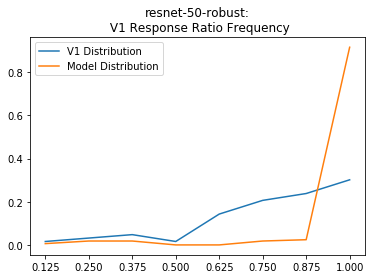

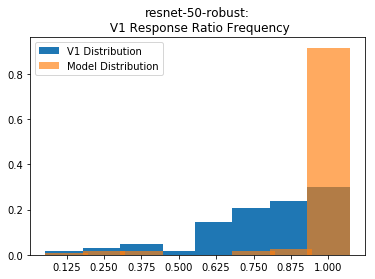

In [ ]:
create_response_ratio_plots(model_identifier=model_identifier, BO_responses=BO_responses, region=region, save_figs_and_data=1, path=save_path)